### Dependencias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


### Generación de Datos Sintéticos

In [3]:
X,y = make_blobs(100,2,centers=2,cluster_std=16)

### Conjunto de Entrenamiento $S_n=\{(x^{(i)},y^{(i)}), i=1,\cdots,n\}$

In [6]:
Sn = pd.DataFrame(X, columns=['x1','x2'])
Sn['y']= y
Sn.head()

,x1,x2,y
0,-15.219727,4.205522,1
1,-17.719732,-8.141273,1
2,-16.681721,-5.281649,0
3,-4.361015,15.714144,0
4,7.825553,6.919290,0


### Visualización de los Datos

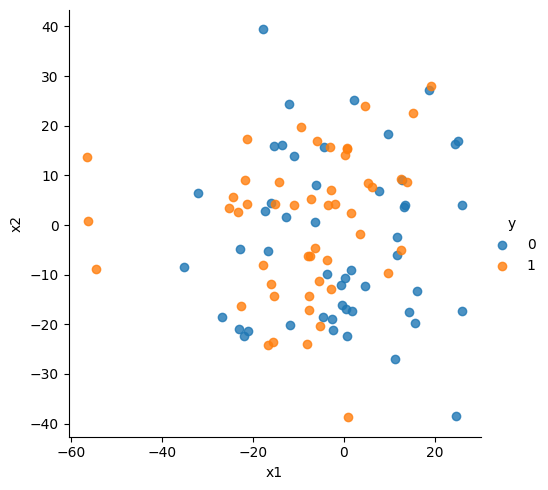

In [11]:
sns.lmplot(data=Sn,x='x1',y='x2',hue='y',fit_reg=False)

### Pasivo-Agresivo

In [16]:
pa= PassiveAggressiveClassifier(C=0.1) # c es nuestra lambda
pa.fit(X,y)

PassiveAggressiveClassifier(C=0.1)

#### Parámetros del modelo 

Estos son nuestro "theta" y nuestro "theta0". Notemos que son array dentro de arrays. Debemos sacarlos.

In [17]:
pa.coef_,pa.intercept_

(array([[-0.0783954 , -0.03292075]]), array([0.38604205]))

In [22]:
pa.coef_

array([[-0.0783954 , -0.03292075]])

In [25]:
theta=pa.coef_[0]
theta

array([-0.0783954 , -0.03292075])

In [27]:
theta0=pa.intercept_[0]
theta0

0.3860420467174671

#### Graficamos la recta de separación 

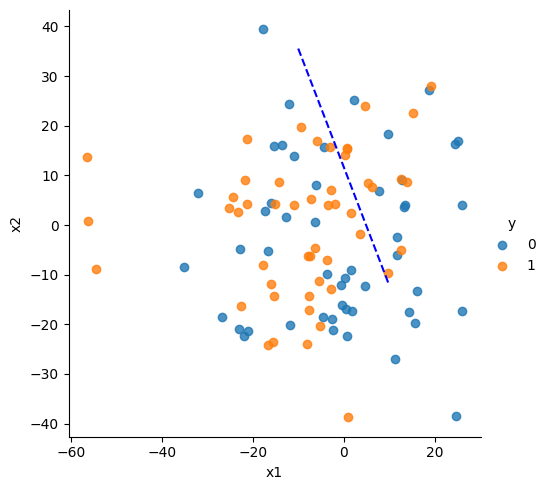

In [28]:
sns.lmplot(data=Sn, x='x1', y='x2', hue='y', fit_reg=False)
x1 = np.linspace(-10,10,100)
x2 = (-theta0-theta[0]*x1)/theta[1]
plt.plot(x1,x2,linestyle='--', color='blue')

### MVS / SVM

In [29]:
svc= SVC(C=0.1, kernel='linear')
svc.fit(X,y)

SVC(C=0.1, kernel='linear')

In [30]:
svc.coef_,svc.intercept_

(array([[-0.03946672,  0.03788664]]), array([-0.12159521]))

#### Gráfica de la frontera de decisión

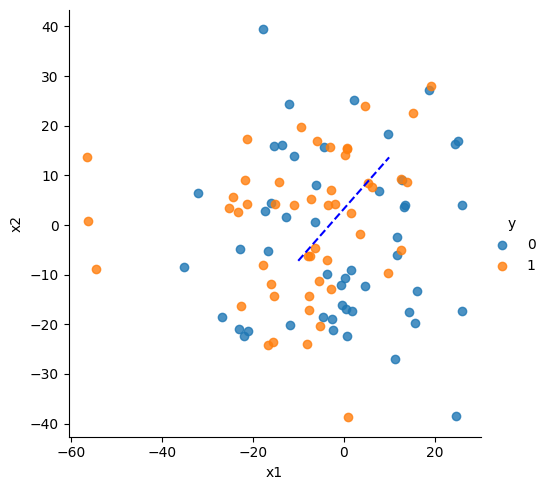

In [31]:
theta,theta0=svc.coef_[0], svc.intercept_[0]
sns.lmplot(data=Sn,x='x1',y='x2',hue='y',fit_reg=False)
x1 = np.linspace(-10,10,100)
x2 = (-theta0-theta[0]*x1)/theta[1]
plt.plot(x1,x2,linestyle='--', color='blue')